O conjunto de dados refere-se a clientes de um distribuidor atacadista. Inclui os gastos anuais em unidades monetárias (m.u.) em diversas categorias de produtos.

Fonte: Margarida G. M. S. Cardoso, margarida.cardoso '@' iscte.pt, ISCTE-IUL, Lisbon, Portugal

## Importação das bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Importação do arquivo de dados

In [2]:
uci_customers = pd.read_csv('wholesale_customers_data.csv')

## Visualização das 5 primeiras linhas do conjunto de dados

In [3]:
uci_customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


Verifica-se assim que o conjunto de dados contém 8 colunas: 

CHANNEL: tipo de canal de compra do consumidor (1 - Horeca (hotel/restaurante/cafés); 2 - varejo)

REGION: região do consumidor

FRESH: total anual gasto em produtos frescos

MILK: total anual gasto em produtos derivados do leite

GROCERY: total anual gasto em produtos de supermercado

FROZEN: total anual gasto em produtos congelados

DETERGENTS_PAPER: total anual gatso em produtos de limpeza

DELICATESSEN: total anual gasto em produtos de delicatessen

## Número de colunas (características) e linhas (instâncias) no conjunto de dados

In [4]:
uci_customers.shape

(440, 8)

O conjunto de dados possui 440 instâncias distribuídas em 8 colunas

## Verificar se existem valores nulos

In [5]:
uci_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


De acordo com o resultado acima, todas as 8 colunas possuem 440 instâncias não-nulas que são variáveis do tipo inteiro (numéricas). Pode-se usar o seguinte comando para verificar ainda a soma de todos os valores nulos:

In [6]:
uci_customers.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

O valor da soma é zero em todas as colunas porque não há valores nulos no conjunto de dados.

## Descrição estatística do conjunto de dados

In [7]:
uci_customers.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


Na tabela acima foram retornados a quantidade de instâncias, a média (mean), o desvio-padrão (std), o valor mínimo (min) e o máximo (max), bem como os percentis (25%, 50% e 75%) de cada coluna.

A média de gasto dos consumidores com derivados do leite (Milk), por exemplo, é de 5796 unidades monetárias. Com relação aos produtos congelados, o maior gasto por um consumidor foi de 60869 unidades monetárias. Este valor pode ser um outlier (anomalia) ou pode se referir a um consumidor que comprou o produto para revenda. 

Para verificar se existem outliers no conjunto de dados, usamos a análise de boxplot. Para as colunas Fresh e Grocery, por exemplo, tem-se:

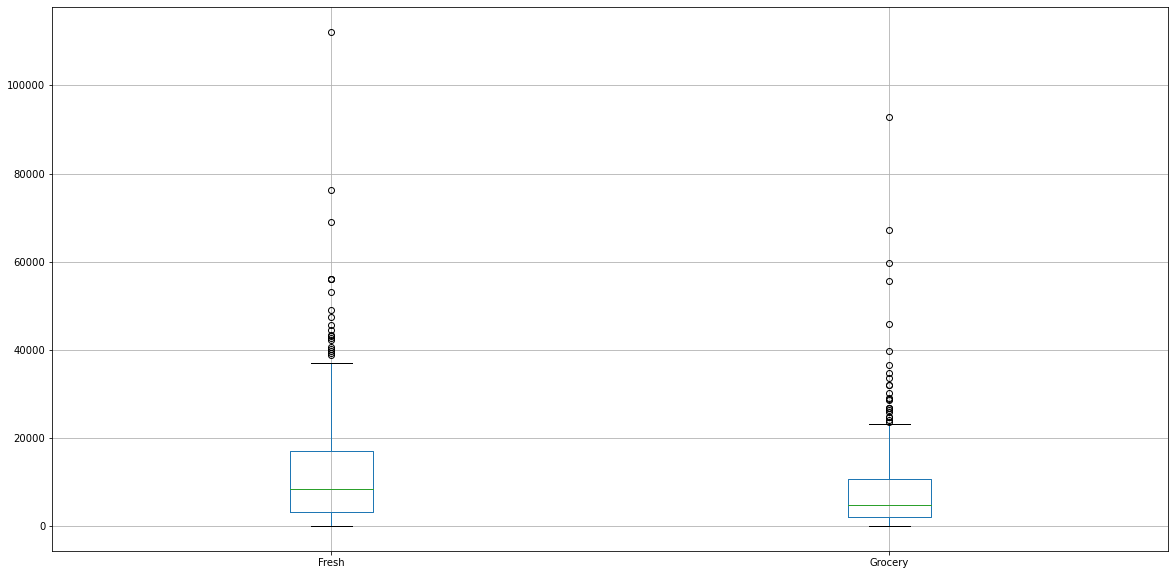

In [8]:
plt.figure(figsize=(20,10))
uci_customers.boxplot(column=['Fresh','Grocery'])
plt.show()

Esta análise indica a possível presença de outliers, representados pelos pontos acima da barra horizontal. Estes valores são superiores a dois desvios-padrão acima da média dos valores da coluna.

Nos dois casos, há mais dados concentrados no terceiro quartil, indicando que há mais pessoas que gastam acima da média do que abaixo da média. Devido à presença de outliers, pode ser melhor usar a mediana ao invés da média para se ter uma ideia da média de gastos dos consumidores. Os outliers podem elevar o valor da média, o que não ocorre com a mediana.

In [10]:
uci_customers.median()

Channel                1.0
Region                 3.0
Fresh               8504.0
Milk                3627.0
Grocery             4755.5
Frozen              1526.0
Detergents_Paper     816.5
Delicassen           965.5
dtype: float64

In [11]:
uci_customers.mean()

Channel                 1.322727
Region                  2.543182
Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicassen           1524.870455
dtype: float64

In [15]:
percent = 100*(uci_customers.mean()-uci_customers.median())/(uci_customers.median())
percent

Channel              32.272727
Region              -15.227273
Fresh                41.113567
Milk                 59.808820
Grocery              67.201709
Frozen              101.306148
Detergents_Paper    252.907922
Delicassen           57.935832
dtype: float64

Nos resultados acima verifica-se a diferença entre a média e a mediana das instâncias em cada coluna. Os valores de média para as categorias de produtos são maiores que os valores de mediana por causa dos outliers e da concentração de dados no terceiro quartil. Para categorias como Detergents_Paper e Delicatessen, a diferença entre a média e a mediana dos gastos é de mais de 100%.

## Distribuição dos clientes por gênero

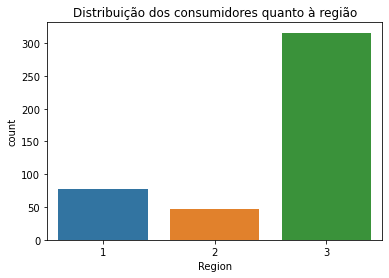

In [16]:
sns.countplot(x='Region', data=uci_customers); 
plt.title('Distribuição dos consumidores quanto à região');  

Analisando o gráfico, verifica-se que não há uma distribuição homogênea de clientes nas 3 regiões onde os dados foram coletados. Hpa muito mais consumidores na região 3 do que nas regiões 1 e 2.

## Distribuição dos consumidores pelo gasto com produtos derivados do leite

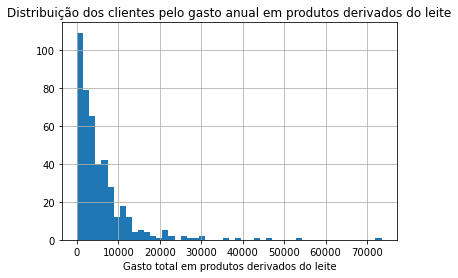

In [26]:
uci_customers.hist('Milk', bins=50);
plt.title('Distribuição dos clientes pelo gasto anual em produtos derivados do leite');
plt.xlabel('Gasto total em produtos derivados do leite');

In [35]:
median = uci_customers.median()
median

Channel                1.0
Region                 3.0
Fresh               8504.0
Milk                3627.0
Grocery             4755.5
Frozen              1526.0
Detergents_Paper     816.5
Delicassen           965.5
dtype: float64

Pelo gráfico acima, verifica-se que a maioria dos consumidores gasta até 10000 unidades monetárias por ano com produtos derivados do leite.

### Distribuição dos gastos com derivados do leite por canal

Os consumidores podem comprar produtos através do canal 1(hotéis, restaurantes e cafés) ou do canal 2 (varejo). No gráfico abaixo, verifica-se qie a maioria dos consumidores adquire produtos derivados do leite pelo canal 1, porém os gastos neste canal são menores porque os produtos normalmente são comprados avulsos. No canal 2 há menos vendas, porém o valor da venda é maior.

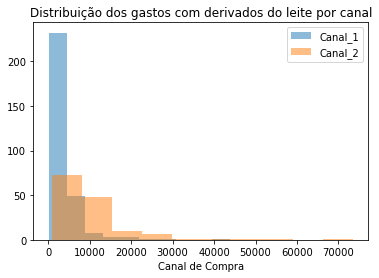

In [39]:
canal_1=uci_customers[uci_customers['Channel']==1]
canal_2= uci_customers[uci_customers['Channel']==2]
plt.hist('Milk', data=canal_1, alpha=0.5, label='Canal_1');
plt.hist('Milk', data=canal_2, alpha=0.5, label='Canal_2');
plt.title('Distribuição dos gastos com derivados do leite por canal');
plt.xlabel('Canal de Compra');
plt.legend(); 

Text(0.5, 1.0, 'Gastos anuais por consumidor')

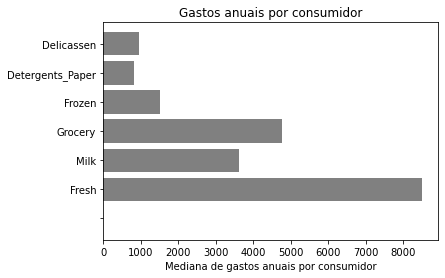

In [38]:
labels = ['','','Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
plt.barh(labels, median, color = 'grey')
plt.xlabel('Mediana de gastos anuais por consumidor')
plt.title('Gastos anuais por consumidor')

Considerando todas as categorias de produtos, a maior mediana de gastos anuais por consumidor é devida aos produtos frescos (Fresh).

## Gastos anuais com produtos de supermercado 

O gráfico abaixo mostra que, embora haja uma grande quantidade de consumidores comprando produtos em supermercados, os gastos anuais dos consumidores são em geral menores que 10000 unidades monetárias.

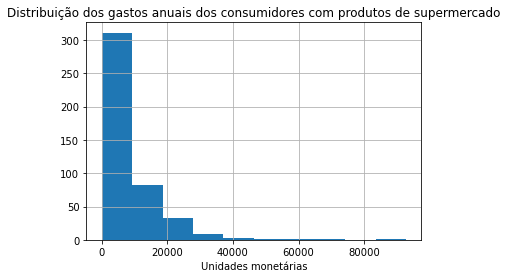

In [40]:
uci_customers.hist('Grocery');
plt.title('Distribuição dos gastos anuais dos consumidores com produtos de supermercado');
plt.xlabel('Unidades monetárias');

## Impacto da região nos gastos com supermercado

O gráfico abaixo mostra que há muito mais consumidores de produtos de supermercado na região 3. É necessário verificar se os dados são consistentes e, caso sejam, há uma oportunidade de crescimento deste distribuidor atacadista na região 3.

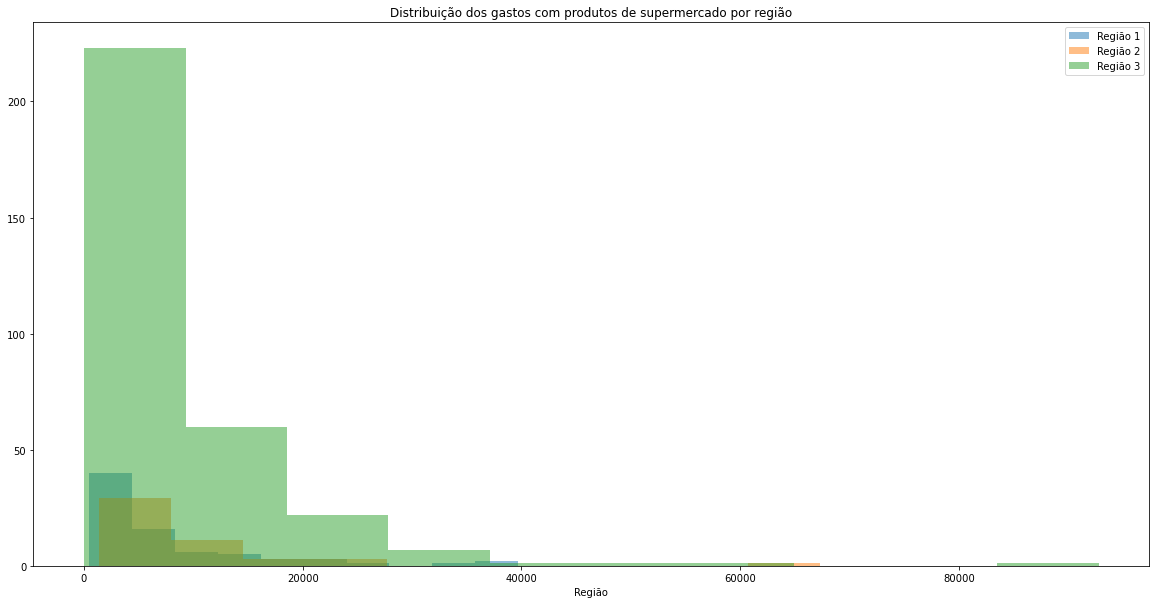

In [42]:
plt.figure(figsize=(20,10))


regiao_1=uci_customers[uci_customers['Region'] == 1]
regiao_2=uci_customers[uci_customers['Region'] == 2]
regiao_3=uci_customers[uci_customers['Region'] == 3]

plt.hist('Grocery', data=regiao_1, alpha=0.5, label='Região 1');
plt.hist('Grocery', data=regiao_2, alpha=0.5, label='Região 2');
plt.hist('Grocery', data=regiao_3, alpha=0.5, label='Região 3');

plt.title('Distribuição dos gastos com produtos de supermercado por região');
plt.xlabel('Região');
plt.legend();

##  Valor anual médio de gastos  dos consumidores por região

Para complementar o resultado anterior, observa-se nos resultados abaixo que os maiores gastos dos consumidores na região 3 são com produtos frescos e produtos de supermercado, mostrando uma oportunidade de ampliação na distribuição dos mesmos.

Nas regiões 1 e 2 o padrão de gastos é semelhante, porém o número de consumidores é menor.

In [44]:
regiao_1=uci_customers[uci_customers['Region'] == 1]
regiao_2=uci_customers[uci_customers['Region'] == 2]
regiao_3=uci_customers[uci_customers['Region'] == 3]

print('Valor anual médio gasto pelos clientes da região 1: \n',regiao_1[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']].mean()) #imprime o valor médio para a região 1
print('Valor anual médio gasto pelos clientes da região 2: \n',regiao_2[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']].mean()) #imprime o valor médio para a região 2
print('Valor anual médio gasto pelos clientes da região 3: \n',regiao_3[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']].mean()) #imprime o valor médio para a região 3

Valor anual médio gasto pelos clientes da região 1: 
 Fresh               11101.727273
Milk                 5486.415584
Grocery              7403.077922
Frozen               3000.337662
Detergents_Paper     2651.116883
Delicassen           1354.896104
dtype: float64
Valor anual médio gasto pelos clientes da região 2: 
 Fresh               9887.680851
Milk                5088.170213
Grocery             9218.595745
Frozen              4045.361702
Detergents_Paper    3687.468085
Delicassen          1159.702128
dtype: float64
Valor anual médio gasto pelos clientes da região 3: 
 Fresh               12533.471519
Milk                 5977.085443
Grocery              7896.363924
Frozen               2944.594937
Detergents_Paper     2817.753165
Delicassen           1620.601266
dtype: float64


## Média dos gastos por região e por tipo de produto consumido


O gráfico abaixo mostra que a maior média de gatsos dos consumidores em todas as regiões é com produtos frescos, seguida de produtos de supermercado e derivados do leite.

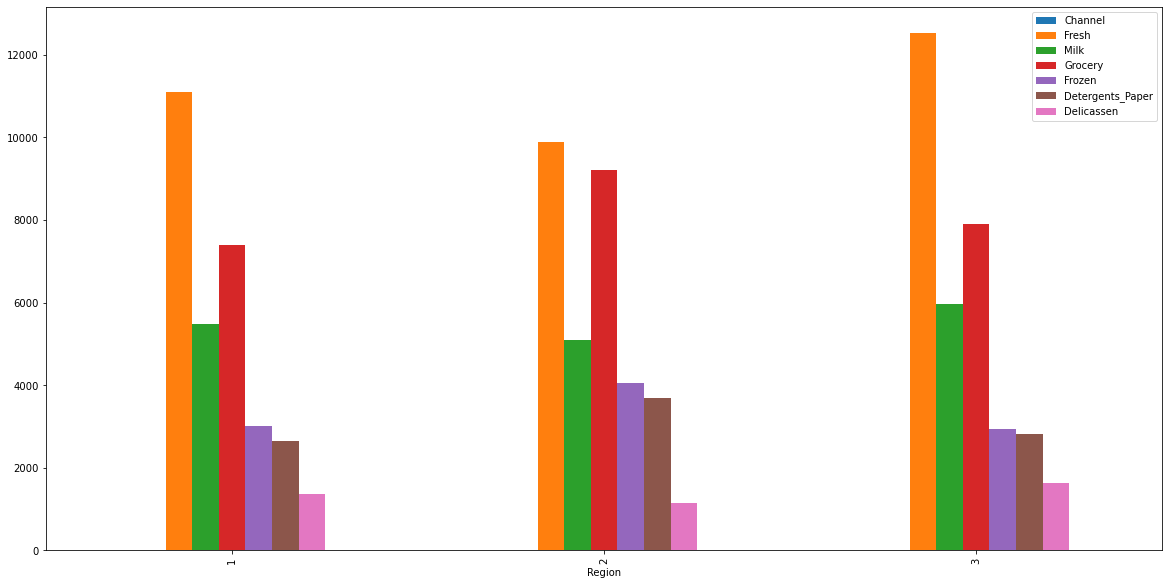

In [46]:
df_customers_mean=uci_customers.groupby('Region').mean()
df_customers_mean.plot(kind='bar',figsize=(20,10))
plt.show()

A figura abaixo mostra que há uma concentração de compras com valores menores de produtos de supermercado e delicatessen nas 3 regiões, indicando que muitos consumidores compram em pequenas quantidades mas compram frequentemente.

C:\Users\vivie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


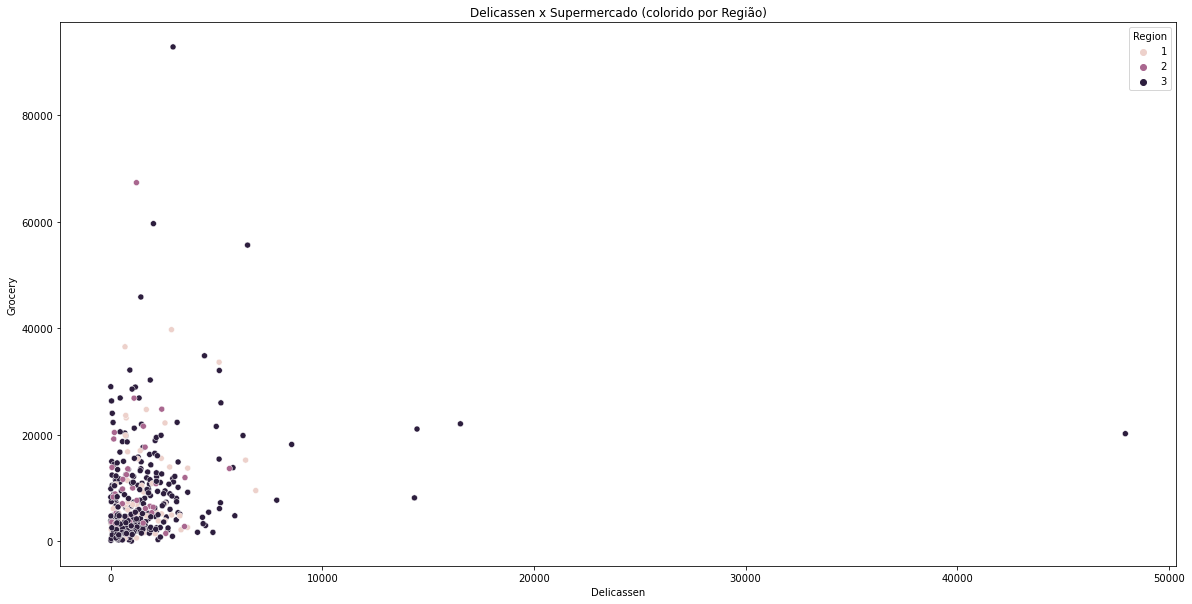

In [48]:
plt.figure(figsize=(20,10))

sns.scatterplot('Delicassen', 'Grocery', hue='Region', data=uci_customers);
plt.title('Delicassen x Supermercado (colorido por Região)');
plt.show()

## Correlação entre as variáveis

Através da correlação de Pearson, verifica-se abaixo que há uma correlação muito forte (0,92) entre os gastos com supermercado e produtos de higiene. Logo , é vantajoso oferecer produtos de higiene nos supermercados. Da mesma forma, há correlação forte entre os gastos com supermercado e derivados do leite e entre leite e produtos de higiene. Todas estas correlações são positivas, o que significa que os gastos com um item aumentam à medida qu os gastos com o outro item também aumentam. Assim, é razoável oferecer produtos de higiene e derivados do leite em supermercados.

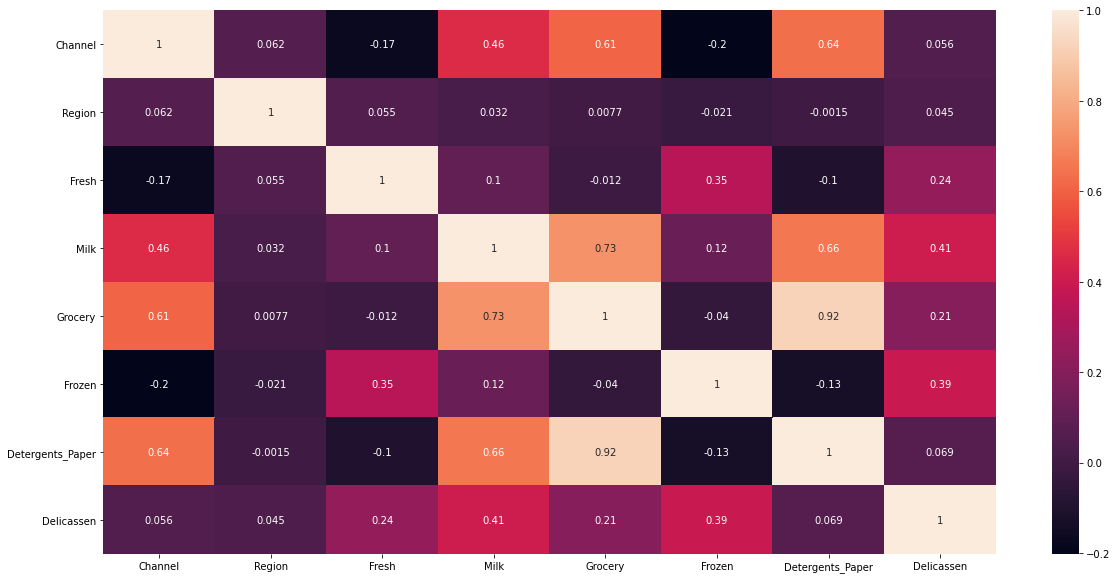

In [51]:
plt.figure(figsize=(20,10))

sns.heatmap(uci_customers.corr(), annot=True)
plt.show()

## Compras em supermercado x detergente e papel por região

A figura abaixo mostra que há correlação entre os gastos com supermercado e com produtos de higiene (detergente e papel). Há pouca dispersão dos dados e os pontos estão visualmente concentrados em torno da média.

C:\Users\vivie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


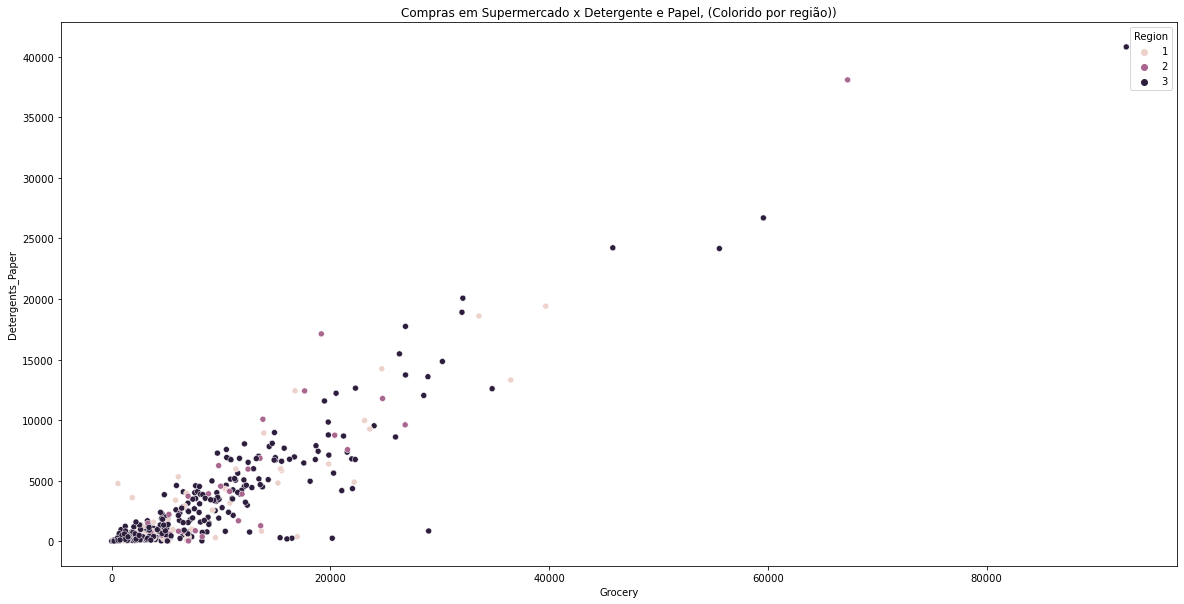

In [53]:
plt.figure(figsize=(20,10))

sns.scatterplot('Grocery', 'Detergents_Paper', hue='Region', data=uci_customers);   
plt.title('Compras em Supermercado x Detergente e Papel, (Colorido por região))'); 
plt.show()

Podemos aplicar uma regressão linear sobre estes dados para prever gastos futuros dos consumidores.

In [54]:
# Importação das bibliotecas
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn import metrics 

In [55]:
# Seleção dos dados de entrada
X = uci_customers['Grocery'].values.reshape(-1,1) 
y = uci_customers['Detergents_Paper'].values.reshape(-1,1) 

In [56]:
# Divisão do conjunto em dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [57]:
# Treinamento do modelo
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

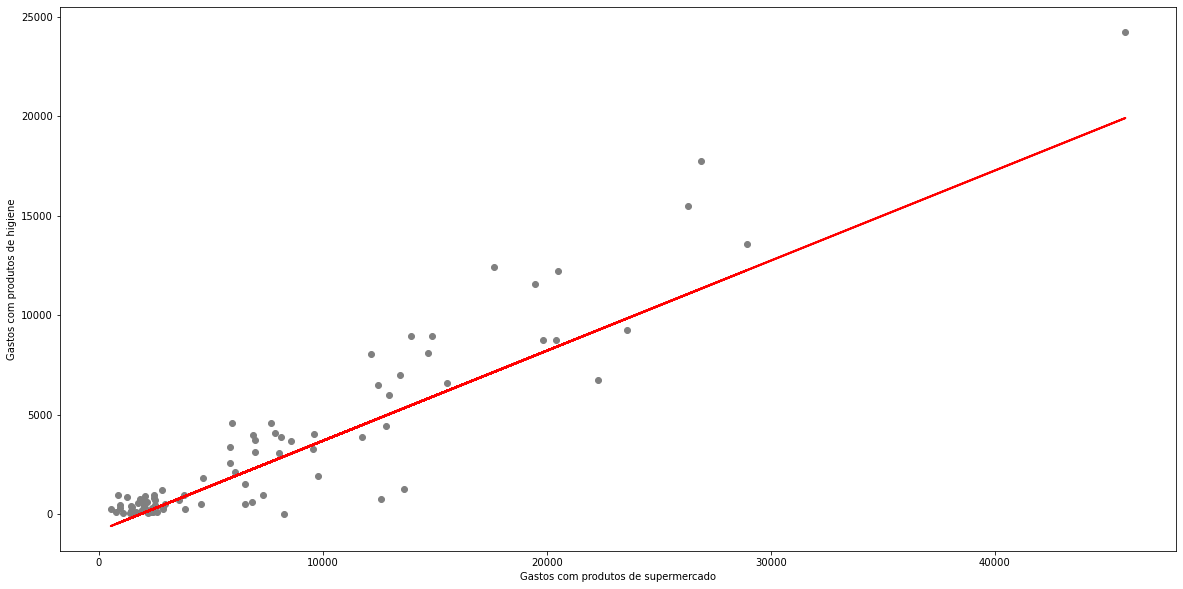

In [58]:
# Previsão do modelo de regressão
plt.figure(figsize=(20,10))
y_pred = regressor.predict(X_test) 
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('Gastos com produtos de supermercado')
plt.ylabel('Gastos com produtos de higiene')
plt.show()

O gráfico anterior mostra que um modelo representado por uma equação de reta representa bem os resultados de teste, principalmente quando os gastos são menores. O coeficiente R² indica que a reta se ajusta bem a 84% dos dados de teste.

In [61]:
# Coeficiente de determinação R² para o modelo
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.847492289734609

In [62]:
# Equação da reta
print("A equação da reta é Y = {}*X {}".format(regressor.coef_[0],regressor.intercept_[0]))

A equação da reta é Y = [0.45264797]*X -839.4404680193993


Usando o modelo cuja equação é a equação da reta acima, podemos prever gastos futuros com produtos de higiene a partir dos gastos dos consumidores com produtos de supermercado.

In [63]:
regressor.predict(np.array([25000]).reshape(-1,1))

array([[10476.75872836]])

O modelo prevê que um cliente que gasta 25000 unidades monetárias ao ano com produtos de supermercado irá gastar 10476 unidades monetárias com produtos de higiene.

## Correlações por região 

Região 1

Na região 1, a correlação entre produtos de supermercado e produtos de higiene e o canal de distribuição é forte e a correlação do canal com derivados de leite é média. A maior parte dos clientes compra estes produtos no canal de distribuição 1 (hotéis,  restaurantes e cafés). Os gastos com produtos derivados do leite têm correlação forte com os gastos com produtos de higiene. Já os gastos com supermercado têm forte correlação com os gastos com derivados do leite. Na matriz de correlação total (esquerda), estes 3 itens também apresentam as correlações mais fortes.

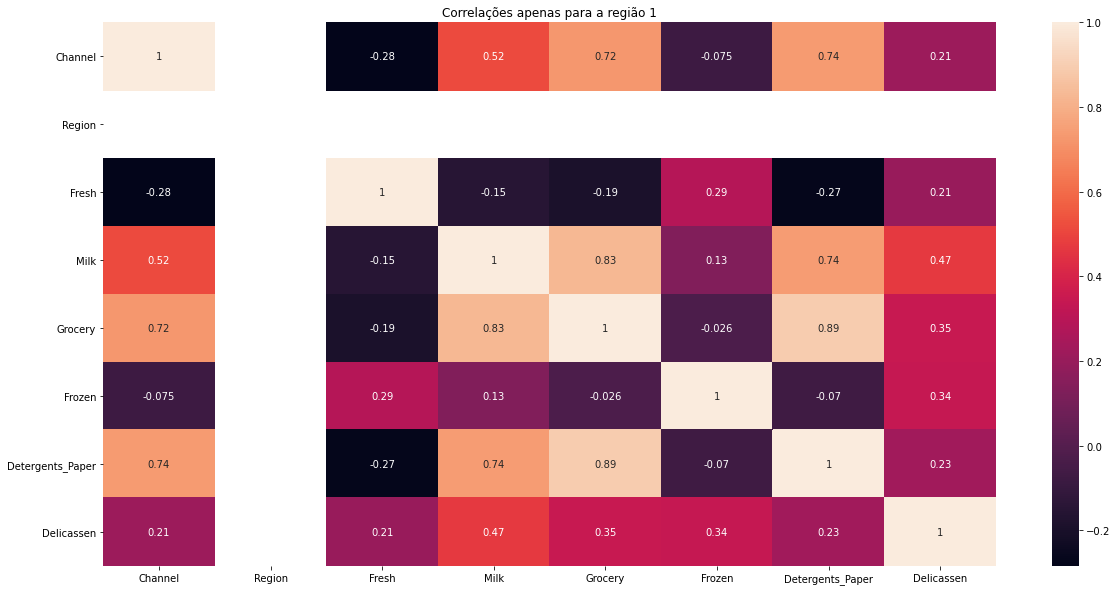

In [64]:
plt.figure(figsize=(20,10))
sns.heatmap(regiao_1.corr(), annot=True); 
plt.title('Correlações apenas para a região 1'); 

## Segmentação de clientes utilizando compras no supermercado e produtos de limpeza

In [69]:
# Importação da biblioteca
from sklearn.cluster import KMeans

In [70]:
# Dados para a construção do modelo
segmentacao_1 = uci_customers[['Grocery' , 'Detergents_Paper']].iloc[: , :].values #transforma os dados em array

In [71]:
# Treinamento do modelo
kmeans = KMeans(n_clusters=3)
kmeans.fit(segmentacao_1)
y_kmeans = kmeans.predict(segmentacao_1)

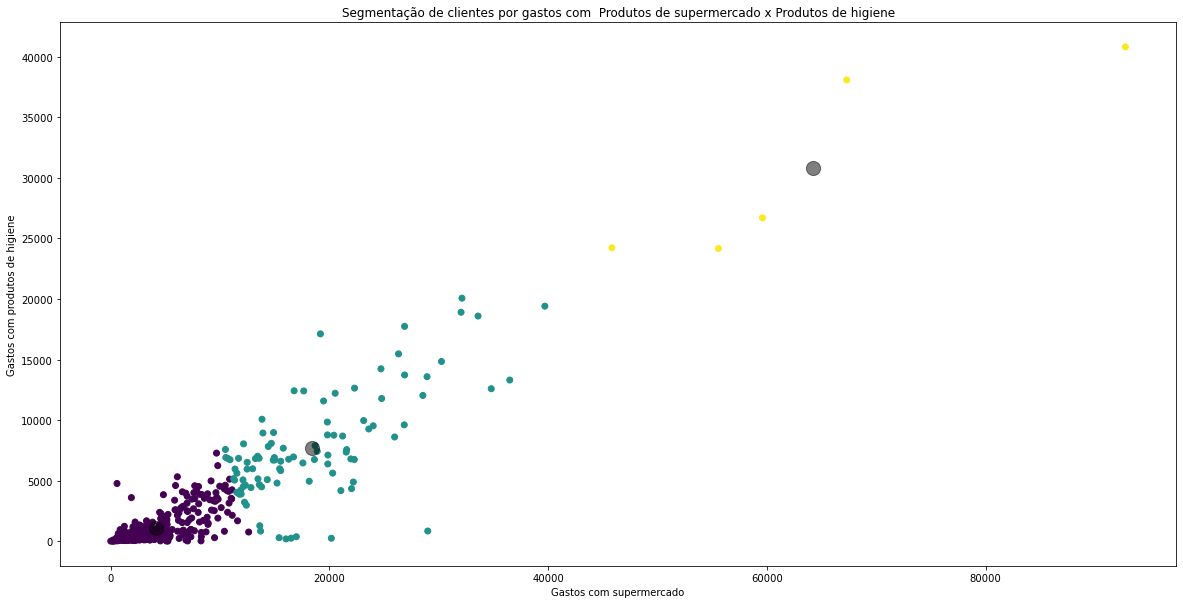

In [72]:
# Construção da figura
plt.figure(figsize = (20 , 10))
plt.scatter(segmentacao_1[:, 0], segmentacao_1[:, 1], c=y_kmeans, cmap='viridis') #constrói o gráfco de dispersão com os grupos
centers = kmeans.cluster_centers_ 
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.xlabel("Gastos com supermercado")
plt.ylabel("Gastos com produtos de higiene")
plt.title("Segmentação de clientes por gastos com  Produtos de supermercado x Produtos de higiene") 
plt.show()

A figura acima mostra a segmentação de clientes pelos gastos com supermercado e produtos de higiene divididos em grupos. O grupo de clientes que gastam muito com produtos de supermercado e de higiene é o menor existente. A maioria dos consumidores tem gastos baixos ou médios com esses produtos.

## Conclusão

Esta análise mostra que grande parte dos consumidores está localizada na região 3 e consome mais produtos do distribuidor no canal 1 (hotéis, restaurantes e cafés), porém as compras são de menor valor. Logo, o distribuidor deve investir em vendas avulsas em hotéis, restaurantes e cafés na região 3, particularmente de produtos de supermercado, derivados do leite e produtos de higiene.